# Задание 1

Разделите данные Титаника (*train.csv*) на тренировочную, валидационную и тестовую часть. С помощью валидационной части подберите гиперпараметры для моделей Random Forest, XGBoost, Logistic Regression и KNN. Получите точность этих моделей на тестовой части.

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def prepare_num(df):
    df_num = df.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
    df_sex = pd.get_dummies(df['Sex'])
    df_emb = pd.get_dummies(df['Embarked'], prefix='Emb')
    df_pcl = pd.get_dummies(df['Pclass'], prefix='Pclass')

    df_num = pd.concat((df_num, df_sex, df_emb, df_pcl), axis=1)
    return df_num

In [254]:
data_train = pd.read_csv('titanic/train.csv')

x = data_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
x_tst = data_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data_train['Survived']

x_num = prepare_num(x)
x_num_tst = prepare_num(x_tst)

x_num = x_num.fillna(x_num.median())
x_num_tst = x_num_tst.fillna(x_num.median())
X_train, X_test, y_train, y_test = train_test_split(x_num, y, test_size = 0.2, random_state = 200, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 200)

scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X_train)
scaled_x_tst = scaler.transform(X_test)
scaled_x_val = scaler.transform (X_val)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [255]:
model = RandomForestClassifier(n_estimators=20, max_depth=4, criterion='entropy')
model.fit(scaled_x, y_train)
predict = model.predict(scaled_x)

print(accuracy_score(y_train, predict))

0.836555360281195


# Задание 2

С помощью RandomForest выберите 2, 4, 8 самых важных признаков и проверьте точность моделей только на этих признаках.

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
df_main = pd.read_csv('titanic/train.csv')
y = df_main['Survived']

def prepare_num(df):
    df_num = df.drop(['Sex', 'Embarked', 'Pclass', 'Name', 'Ticket', 'Cabin'], axis=1)
    df_sex = pd.get_dummies(df['Sex'])
    df_emb = pd.get_dummies(df['Embarked'], prefix='Emb')
    df_pcl = pd.get_dummies(df['Pclass'], prefix='Pclass')
    df_num = pd.concat((df_num, df_sex, df_emb, df_pcl), axis=1)
    df_num = df_num.fillna(df_num.median())
    return df_num

In [390]:
X_train = prepare_num(df_main)
X_train = X_train.drop(['Survived'], axis = 1)

model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(X_train, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

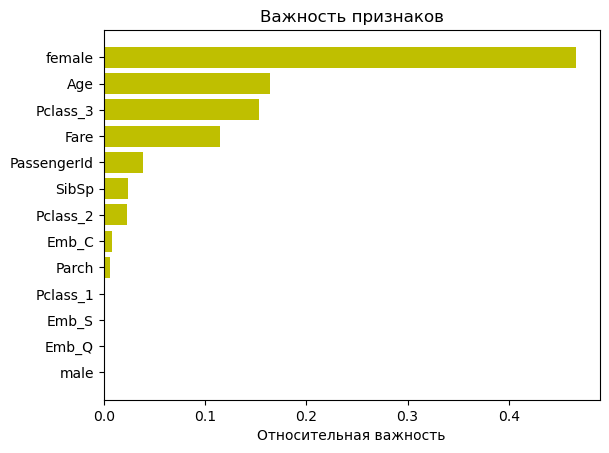

In [391]:
importances = model.feature_importances_
features = X_test.columns
indices = np.argsort(importances)

plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [392]:
#222222222222
X_train_22 = X_train.drop(['Pclass_1', 'Pclass_2', 'Pclass_3'], axis=1)
X_train_22 = X_train_22.drop(['Fare', 'SibSp', 'PassengerId', 'Parch', 'male'], axis=1)
X_train_22 = X_train_22.drop(['Emb_S', 'Emb_Q', 'Emb_C'], axis=1)

model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X_train_22, y)
predict_22 = model.predict(X_train_22)

print("Точность: %.2f" % accuracy_score(predict_22, y))

Точность: 0.79


In [393]:
#4444444444
X_train_44 = X_train.drop(['Pclass_1', 'Pclass_2'], axis=1)
X_train_44 = X_train_44.drop([ 'SibSp', 'PassengerId', 'Parch', 'male'], axis=1)
X_train_44 = X_train_44.drop(['Emb_S', 'Emb_Q', 'Emb_C'], axis=1)

model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X_train_44, y)
predict_44 = model.predict(X_train_44)

print("Точность: %.2f" % accuracy_score(predict_44, y))

Точность: 0.79


In [394]:
#8888888
X_train_88 = X_train.drop(['Pclass_1'], axis=1)
X_train_88 = X_train_88.drop(['male'], axis=1)
X_train_88 = X_train_88.drop(['Emb_S', 'Emb_Q', 'Emb_C'], axis=1)

model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X_train_88, y)
predict_88 = model.predict(X_train_88)

print("Точность: %.2f" % accuracy_score(predict_88, y))

Точность: 0.79


# Задание 3

Используя координаты скважин из файла *wells_info.csv* разделите их на кластера с помощью любых 4 методов и отобразите разделение. Параметры подбираются самостоятельно.

In [12]:
from sklearn.cluster import MeanShift
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

df_main = pd.read_csv('wells_info.csv')
data_x = np.asarray(df_main['LatWGS84'])
data_y = np.asarray(df_main['LonWGS84'])
X = np.array(list(map(list,list(zip(data_x, data_y)))))

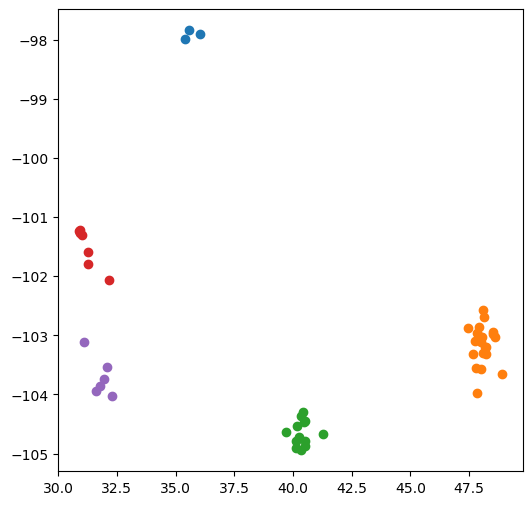

In [13]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(X)

plt.figure(figsize=(6, 6))
for cl in np.unique(clusters):
    _data = X[clusters == cl]
    plt.scatter(_data[:, 0], _data[:, 1])
plt.show()

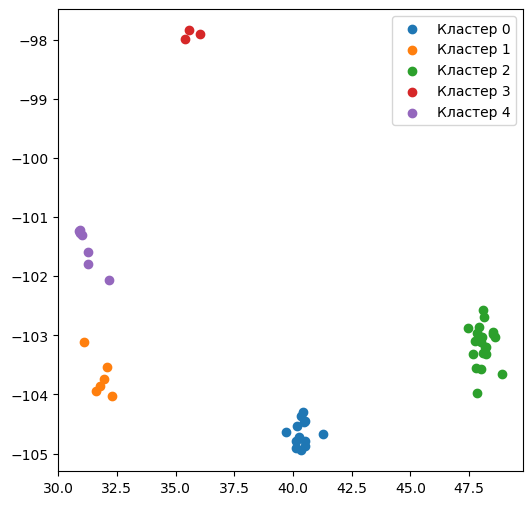

In [14]:
model = DBSCAN(eps=1, min_samples=1)
clusters = model.fit_predict(X)

plt.figure(figsize=(6, 6))
for cl in np.unique(clusters):
    data_ = X[clusters == cl]
    plt.scatter(data_[:, 0], data_[:, 1], label='Кластер {}'.format(cl))
plt.legend(loc=1)
plt.show()

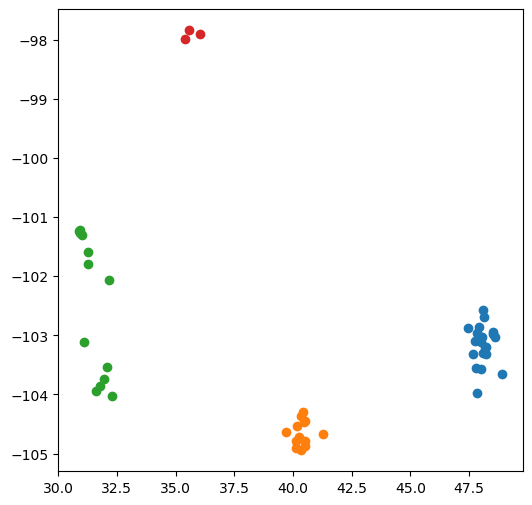

In [15]:
model = MeanShift()
clusters = model.fit_predict(X)

plt.figure(figsize=(6, 6))
for cl in np.unique(clusters):
    data_ = X[clusters == cl]
    plt.scatter(data_[:, 0], data_[:, 1])
plt.show()

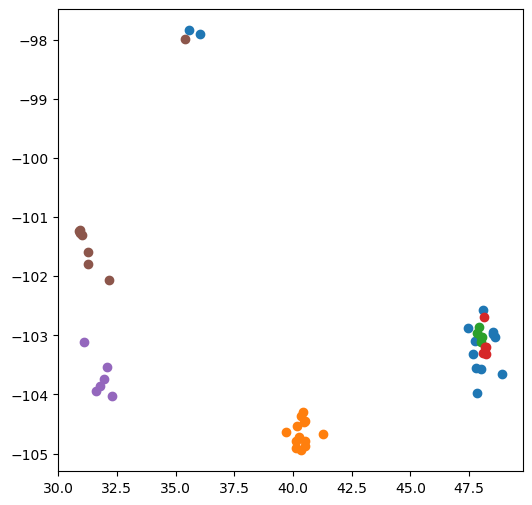

In [16]:
model = OPTICS()
clusters = model.fit_predict(X)

plt.figure(figsize=(6, 6))
for cl in np.unique(clusters):
    data_ = X[clusters == cl]
    plt.scatter(data_[:, 0], data_[:, 1])
plt.show()

# Задание 4

Приведите отобранные в 6.1 задании признаки из файла *wells_info_with_prod.csv* в двумерное пространство. Выделите цветом добычу с этой скважины.

In [17]:
from sklearn.cluster import MeanShift
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

df_main = pd.read_csv('wells_info_with_prod.csv')
df_main.head()

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT,Prod1Year,ProdAll
0,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,39.684606,-104.642128,39.68445,-104.60557,9005.0,994.6866,591.8004,126898,201325
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.6321,22616,34625
2,5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.335390,-104.363000,40.34780,-104.36863,4273.0,1000.2760,564.4841,47523,69009
3,5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.152220,-104.530780,40.17445,-104.52932,7078.0,973.4437,824.0020,59474,81048
4,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.1414,14427,18050


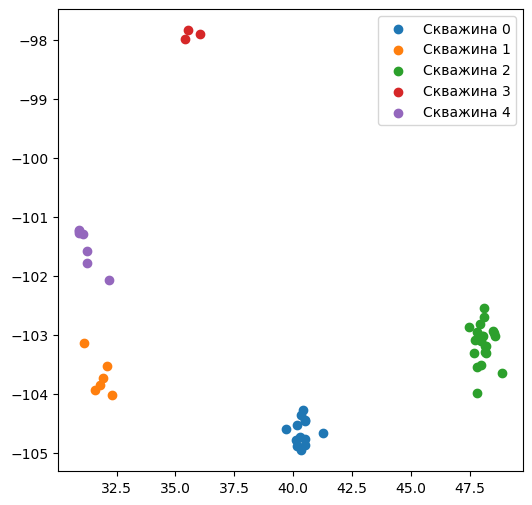

In [18]:
data_x = np.asarray(df_main['BottomHoleLatitude'])
data_y = np.asarray(df_main['BottomHoleLongitude'])
X = np.array(list(map(list,list(zip(data_x, data_y)))))

model = DBSCAN(eps=1, min_samples=1)
clusters = model.fit_predict(X)

plt.figure(figsize=(6, 6))
for cl in np.unique(clusters):
    data_ = X[clusters == cl]
    plt.scatter(data_[:, 0], data_[:, 1], label='Скважина {}'.format(cl))
plt.legend(loc=1)
plt.show()

# Лаба 9.1


Загрузить файл, разделить его на train и test. Для test взять 10% случайно выбранных строк таблицы.
Обучить модели: Decision Tree, XGBoost, Logistic Regression из библиотек sklearn и xgboost. Обучить модели предсказывать столбец label по остальным столбцам таблицы.
Наладить замер Accuracy - доли верно угаданных ответов.
Точности всех моделей не должны быть ниже 85%
С помощью Decision Tree выбрать 2 самых важных признака и проверить точность модели, обученной только на них.

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

def prepare_num(df):
    X = df_main
    df_child = X['age_child'].astype(int)
    df_adult = X['age_adult'].astype(int)
    df_old = X['age_old'].astype (int)
    
    df_morn = X['morning'].astype(int)
    df_day = X['day'].astype(int)
    df_evn = X['evening'].astype (int)
    
    X = df_main.drop(['Unnamed: 0', 'age_adult', 'age_old', 'age_child', 'morning', 'day', 'evening', 'label'], axis=1)
    df_num = pd.concat((X, df_adult, df_old, df_child, df_morn, df_day, df_evn), axis=1)
    return df_num

In [224]:
df_main = pd.read_csv('titanic_prepared.csv')
y = df_main['label']

X = prepare_num(df_main)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X.head()

,sex,row_number,liters_drunk,drink,check_number,age_adult,age_old,age_child,morning,day,evening
0,0,90.0,1.0,1,8092,0,1,0,0,0,1
1,0,81.0,4.0,1,4252,1,0,0,0,1,0
2,1,14.0,3.0,0,6913,0,1,0,0,0,1
3,1,0.0,1.0,0,8479,0,1,0,0,1,0
4,1,84.0,1.0,0,6279,0,1,0,1,0,0


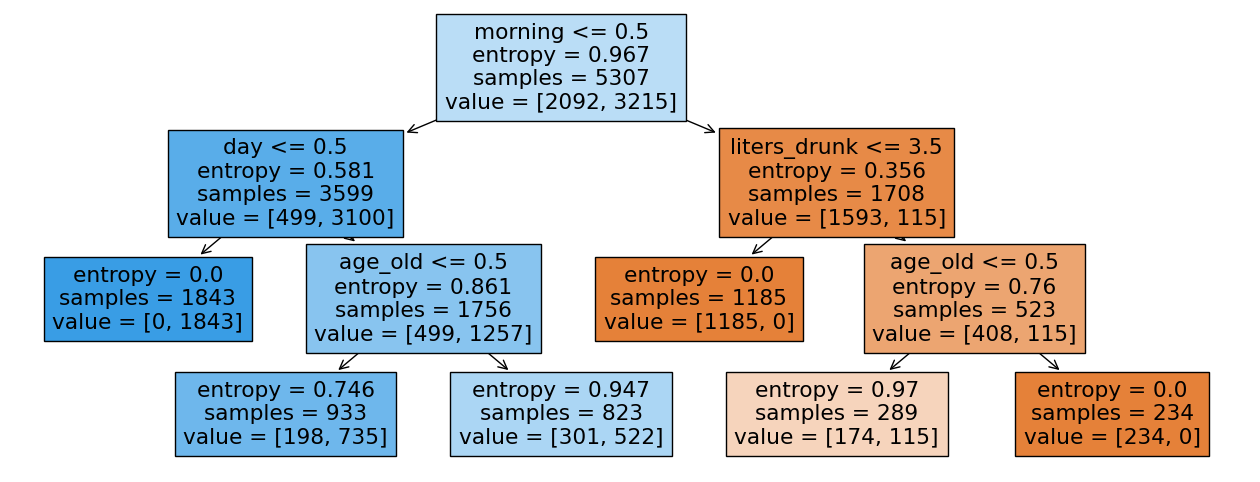

In [225]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train, y_train)

plt.figure(figsize=(16, 6))
tree.plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()

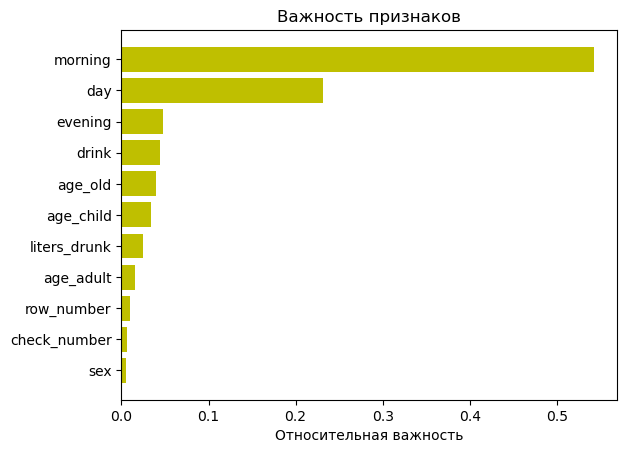

In [228]:
importances = model.feature_importances_
features = X_test.columns
indices = np.argsort(importances)

plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [229]:
model = XGBClassifier(n_estimators=20, max_depth=4)
model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Точность: %.2f" % accuracy_score(y_test, predict))

Точность: 0.91


In [230]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1, solver='lbfgs')
model.fit(X_train, y_train)
predict = model.predict(X_test)

y_pred = model.predict(X_train)
y_proba = model.predict_proba(X_train)

print("Точность: %.2f" % accuracy_score(y_test, predict))

Точность: 0.87


D:\study\conda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [231]:
X = X_train.drop(['sex','row_number','liters_drunk','drink', 'check_number','age_adult','age_old','age_child', 'evening'], axis = 1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y_train, test_size=0.2, random_state=1)
X.head()

,morning,day
5495,0,0
6027,1,0
3111,0,0
5124,0,1
2186,0,1


In [232]:
model = XGBClassifier(n_estimators=20, max_depth=4)
model.fit(X_train_2, y_train_2)

predict = model.predict(X_test_2)
print("Точность: %.2f" % accuracy_score(y_test_2, predict))

Точность: 0.86


In [233]:
model = LogisticRegression(C=0.1, solver='lbfgs')
model.fit(X_train_2, y_train_2)
predict = model.predict(X_test_2)

y_pred = model.predict(X_train_2)
y_proba = model.predict_proba(X_train_2)

print("Точность: %.2f" % accuracy_score(y_test_2, predict))

Точность: 0.86
